<a href="https://colab.research.google.com/github/bhavesh-choudhary1/machine_learning_concept/blob/main/Handling_Missing_Data(CCA(Complete_case_Analysis)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data_science_job.csv')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
df.shape

(19158, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [ ]:
# we will apply CCA for those column that have missing data less than 5 %

# columns are city_development_index,enrolled_university,education_level,experience,training hour

In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

In [ ]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9713,0.92,no_enrollment,Graduate,20.0,7.0
11977,0.55,no_enrollment,Graduate,8.0,196.0
11734,0.92,no_enrollment,Graduate,20.0,21.0
401,0.92,no_enrollment,Graduate,16.0,84.0
6391,0.92,no_enrollment,Graduate,20.0,96.0


In [ ]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [ ]:
new_df = df[cols].dropna()

In [ ]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

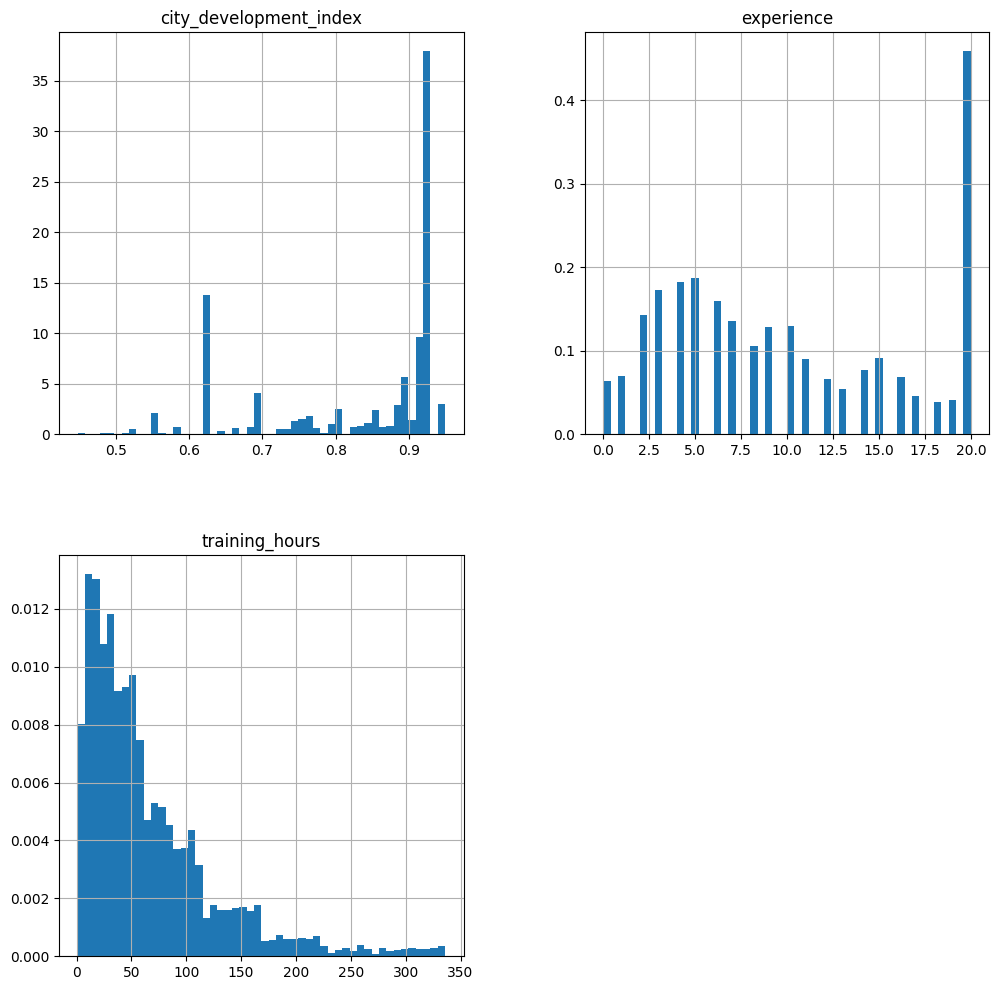

In [ ]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

In [ ]:
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


<Axes: >

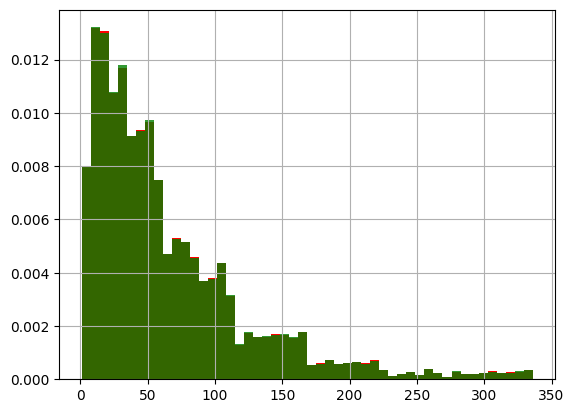

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)

#original data
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution

new_df['training_hours'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

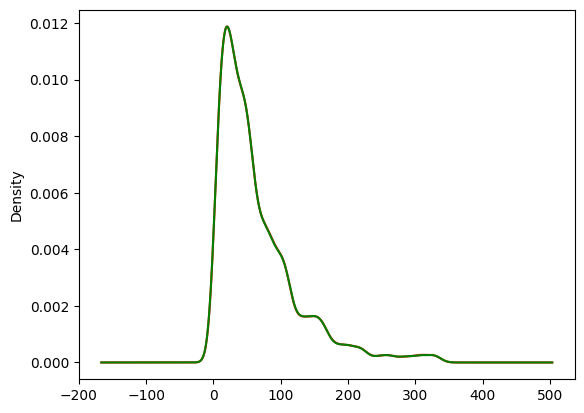

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color='red')

new_df['training_hours'].plot.density(color='green')

<Axes: >

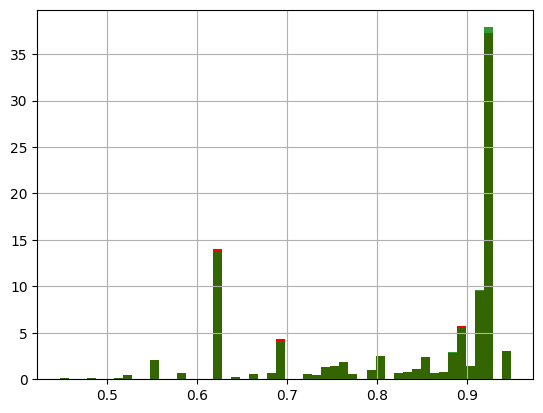

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')

new_df['city_development_index'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

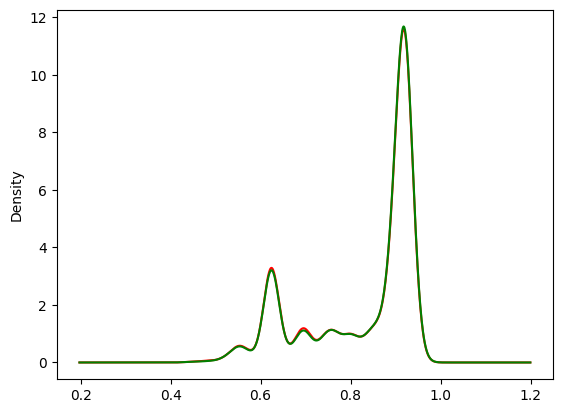

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')

new_df['city_development_index'].plot.density(color='green')

<Axes: >

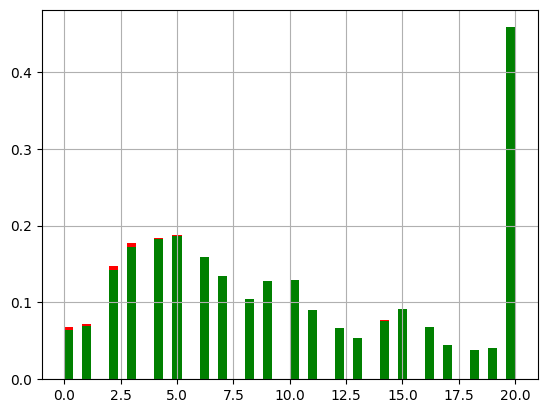

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)

df['experience'].hist(bins=50,ax=ax,density=True,color='red')

new_df['experience'].hist(bins=50,ax=ax,density=True,color='green')

<Axes: ylabel='Density'>

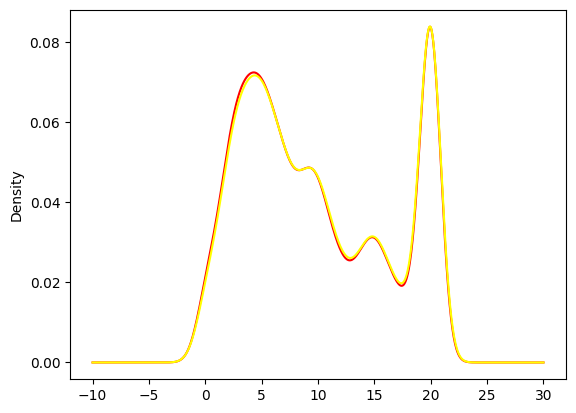

In [ ]:
fig = plt.figure()

ax = fig.add_subplot()

df['experience'].plot.density(color='red')

new_df['experience'].plot.density(color='yellow')

In [ ]:
temp = pd.concat([
    #percentage of observations per category,original data
    df['enrolled_university'].value_counts() / len(df),

    #percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)

    ],axis=1)

#add columns names
temp.columns = ['original','cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp = pd.concat([
    #percentage of observations per category,original data
    df['education_level'].value_counts() / len(df),

    #percentage of observations per category, cca data
    new_df['education_level'].value_counts() / len(new_df)

    ],axis=1)

#add columns names
temp.columns = ['original','cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
